## 비모수 밀도추정(Non-parametric Density Estimation)

이전의 장에서는
1. 특정 클래스의 확률밀도인 우도(likelihood) $p(x|ω_i)$를 알고 있거나 (최우추정법)
2. 우도의 파라메타적인 형태를 안다고 가정 (파라메타 추정) 하였다.

이번 장에서 다루게 될 **비모수 밀도 추정법**은 이러한 가정 없이, 표본 데이터에 대한 확률밀도함수 **$p(x)$ 를 직접 추정** 하는 다음과 같은 방법들에 대하여 배운다.
* 히스토그램
* 커널밀도추정 (KDE: Kernel Density Estimation) : Parzen창 또는 스무드커널을 이용
* k-NNR을 이용한 밀도 추정

<img src="https://i.imgur.com/dggz7Q5.png" width=600>

### 히스토그램(Histogram)

* 데이터의 밀도를 간단한 형태로 표현
* 측정된 스케일로 이루어진 데이터를 연속적인 간격으로 나누고, 각 간격에서 관측되는 표본의 빈도를 카운트하여, 그 값을 막대의 높이로 하여 데이터의 밀도를 표현한 그래프

$$ P_H (x) = { 1 \over N } { \text{(number of } x^{(k} \text{ in same bin as } x ) \over (\text{width of bin containing } x) } $$
<img src="./images/histogram.png" width="250" align="right" style="margin-left:15px;">
**단점**
* 밀도 추정의 최종모양은 **관측간격의 시작점**(starting position of the bins)에 의존함
* 추정된 **밀도가 불연속**적인 이유는 실제 밀도 때문이 아니라 관측간격(bin)의 위치에 의한 오류이다.
* **차원의 저주** : 차원이 증가할수록 관측구간(bin)의 수도 기하급수적으로 증가하며, 대부분의 bin 은 비어있게 된다.

대부분의 실제응용에서는 적절하지 않으나, 1차원 또는 2차원의 경우 **빠른 시각화에 적절**하다.



히스토그램의 시작점 값을 $x_0$, 막대-폭 값을 $h$ 라고 하면, 표본 데이터는 구간 $m$에 대하여 $[x_0+mh, x_0+(m+1)h]$ 에 존재하며, 데이터의 총 개수가 $n$일 때, 확률함수는 다음과 같이 정의한다.

$$ P_H(x) = {1 \over n} \times {Count(x) \over Width(x) } = { Count(x) \over nh} $$

예) 다음과 같은 12개의 데이터에 대한 히스토그램을 구해보자.  
$\{ 2.1, 2.4, 2.3, 2.4, 2.47, 2.7, 2.6, 2.65, 3.3, 3.39, 3.8, 3.87 \}$

막대-폭이 0.5 이고 각 막대의 시작점을 $n.0$ 과 $n.25$ 에 놓을 경우의 히스토그램을 구하
기 위해서 다음과 같은 pyplot.hist() 함수를 사용한다.

* 왼쪽의 히스토그램을 보면 봉우리가 하나이고, 오른쪽으로 갈수록 밀도가 감소함을 알 수 있다.
* 오른쪽의 히스토그램을 보면 봉우리가 2개로, 이전의 히스토그램과는 완전히 다른 양상을 띠는 것을 알 수 있다.

이 예에서 보는 것처럼 히스토그램은 매우 간단한 밀도 추정인 반면 몇 가지 단점이 있다..

(array([0., 0., 0., 1., 7., 0., 2., 2., 0., 0.]),
 array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]),
 <a list of 10 Patch objects>)

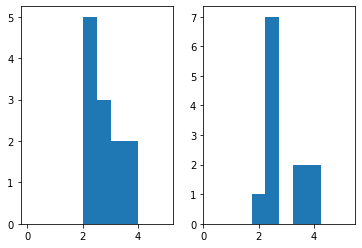

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

a = [2.1, 2.4, 2.3, 2.4, 2.47, 2.7, 2.6, 2.65, 3.3, 3.39, 3.8, 3.87]
plt.subplot(121)
plt.hist(a, 10, range=(0.0, 5)) # (data, N-bins, range=(start,end) )
plt.subplot(122)
plt.hist(a, 10, range=(0.25, 5.25))

### 커널밀도추정(Kernel Density Estimation)


<img src="./images/probability-pdf.png" width="300" align="right">

확률밀도분포 $p(\mathbf{x})$ 로부터 얻어진 특징 벡터 $\mathbf{x}$가 표본 공간상의 영역 $R$에 속할 확률 $P$ 는, 확률 및 확률밀도 정의에 의해서

$$ P = \int_R p(\mathbf{x}')d\mathbf{x}' $$

그 분포로부터 $N$ 개의 벡터 $\{\mathbf{x}_1, \mathbf{x}_2, \cdots, \mathbf{x}_N\}$ 이 얻어진 경우, 이들 $N$ 개의 벡터 중에 $k$개가 $R$ 영역에 속할 확률은, $ N \rightarrow \infty $ 가 되면 영역 R에 떨어지는 점들의 평균비율로부터 제법 정확한 확률 $P$의 추정을 얻게 된다.

$$ P \cong { k \over N }$$

반면에 $p(\mathbf{x})$가 연속이고, 영역 $R$이 아주 작으면, $p(\mathbf{x})$는 그 영역 내에서는 거의 변하지 않는다고 가정할 수 있게 되고, 확률 함수는 영역의 면적/체적과 영역내의 밀도함수 $p(\mathbf{x})$의 평균값의 곱으로 추정 가능하게 된다. ($V$=영역 $R$을 둘러싼 체적범위, $\mathbf{x}^*$=영역 $R$ 내의 한 점)

$$ P(\mathbf{x}) = \int_{\mathbf{x} \in R} p(\mathbf{x})d\mathbf{x} \cong p(\mathbf{x}^*) V $$

<img src="./images/KDE.png" width="250">

위의 결과들을 합치면,

$$  
\left\{ \begin{array}{lll}
P(\mathbf{x})  = \int_R p(\mathbf{x}) d\mathbf{x} \cong p(\mathbf{x}^*) V \\
P(\mathbf{x})  \cong { k \over N }  
\end{array}
\right \}
p(\mathbf{x}^*) \cong { k \over NV } $$



* 이 추정식은 표본의 수 $N$를 증가시키고 체적 $V$를 좁게 할수록 더 정확함

* 하지만, 실제로 전체표본의 수 $N$은 고정되어 있고, 따라서 $p(\mathbf{x})$의 추정이 정확해지려면 체적 $V$를 0(zero)에 근접시켜야 되지만, 그렇게 하면 영역 $R$이 너무 작아져서 표본을 포함하지 않게 된다.

* 따라서 실제로는 체적 V를 결정하는 데 있어서 타협점을 찾아야 한다.
  – 체적 $V$ 내에 충분한 표본이 포함되도록 충분히 크게
  – 체적 $V$ 내에서 “$p(\mathbf{x})$가 일정하다”라는 가정이 적절하도록 충분히 작게

따라서 비모수적 밀도 추정 일반식은

$$p(\mathbf{x}) \cong { k \over NV} $$

여기에서, $V$ : $\mathbf{x}$ 를 둘러싼 영역의 체적, $N$ : 표본의 총수, $k$ : 체적 $V$ 내의 표본의 수  

위의 결과를 실제 확률밀도추정문제에 적용할 수 있는 두 가지 방법

* **KDE (Kernel Density Estimation) 추정법**
  - 체적 $V$를 고정값으로 선택하고, 그 영역 내에 포함된 표본의 수 $k$를 결정하는 방법
  - 체적 $V_n = 1/\sqrt{n}$ 과 같이 지정하여 영역을 줄여가면서 최적의 밀도를 추정하는 방법이다..
  - 대표적인 방법으로 **Parzen 창 추정법**이 있다.
  

* **k-NNR (k Nearest Neighbor Rule) 추정법**
  - 영역 내의 포함될 표본의 수 $k$ 값을 고정된 값으로 선택하고 이에 대응되는 체적 $V$ 를 결정하는 방법
  - 어떤 표본점을 포함하는 체적이 $k = \sqrt{n}$ 개의 표본을 포함하도록 데이터 독립적으로 체적을 줄여나가면서 최적의 밀도를 추정하는 방법.

$N$이 증가함에 따라서 $V$가 축소되며 $k$가 증가 됨을 가정한다면, $N \rightarrow \infty$ 에 따라서 KDE 와 k-NNR 는 실제 확률밀도에 수렴함을 보일 수 있다.

<img src="./images/KDE2.png" width="600">

### Parzen 창에 의한 KDE
* $k$ 개의 표본을 포함하는 영역 $R$이 추정점 $x$를 중심으로 하며 모서리의 길이 h를 갖는
초입방체라하면, 그 체적은 $V=h/D$ 가 되며, 여기에서 $D$는 차원의 수를 말한다.

* 이러한 영역에 포함되는 표본의 수를 찾기 위해서 우리는 다음과 같은 커널함수 $K(u)$ 를 정의한다.

$$ K(u) = 
\begin{cases}
1 & |u_j| < 1/2 \quad \forall j = 1, \cdots, D \\
0 & \text{ otherwise }
\end{cases}
$$

* 원점을 중심으로 하는 단위 초입방체 (hyper-rectangle)로 주어지는 이러한 커널을 Parzen 창(window) 이라고 한다.

* $x$를 중심으로 하는 모서리의 길이가 $h$인 초입방체 안에 점 $x^{(n}$이 놓이게 되면$K((x-x^{(n})/h)$ 는 단위값(=1)을 갖게 되며, 그 외에는 0인 값을 갖게 된다.

<img src="https://i.imgur.com/R4TAg8r.png" width=200>

* 초입방체 내의 점의 총수는 다음과 같이된다.

$$k=\sum _{ n=1 }^{ N }{ K\left(\frac { x - { x }^{(n } }{ h } \right) }$$

* 초입방체 내의 점의 총수를 밀도추정 일반식에 치환하면,

$$ p_{\tiny KDE}(x)= { k \over NV} =\frac { 1 }{ N{ h }^{ D } } \sum _{ n=1 }^{ N }{ K\left(\frac {x - { x }^{(n }}{ h } \right) } $$

* 여기에서 Parzen 창 밀도 추정은 셀 위치가 데이터 점에 의하여 결정된다는 사실을 빼고는 히스토그램과 유사함을 알 수 있다.

<img src="./images/Parzen.png" width="350">

* 커널함수의 역할을 이해하기 위해서 확률밀도추정 $p_{\tiny KDE}(x)$의 기대값을 계산해 보면 다음과 같다. 

$$ E[p_{\tiny KDE}(x)] = { 1 \over Nh^D} \sum_{n=1}^N E \left[ K \left( {x -x^{(n} \over h } \right) \right] $$
$$ = { 1 \over h^D} E \left[ K \left( {x -x^{(n} \over h } \right) \right]  = { 1 \over h^D} \int K \left( {x' -x^{(n} \over h } \right) p(x') dx' $$


* 추정된 확률밀도 $p_{\tiny KDE}(x)$ 의 기대값이 커널 함수의 실제 밀도 $p(x)$의 콘볼루션 형식임을 확인할 수 있다.

* 커널의 폭 $h$는 스무딩 파라미터 역할을 하며, 커널 함수가 넓으면 넓을수록 추정치는 더 부드러워짐

* $h \rightarrow 0$ 이면, 커널은 델타함수에 가까워지고 $p_{\tiny KDE}(x)$ 는 실제 확률밀도에 근접한다. 하지만, 실제 유한한 표본점을 가지므로 델타 함수가 되는 것은 불가능

**Example** 

아래와 같이 자료가 주어진 경우, $y=3,10,15$ 에서의 밀도를 추정하기 위해서 폭은 $h=4$를 사용하여 Parzen창을 사용하여라. 

$$ X = \{ x^{(1}, x^{(2},\cdots,x^{(N},\}= \{4,5,5,6,12,14,15,15,16,17\}$$

<img src="./images/Parzen-ex.png" width="450">

$$p_{\tiny KDE} (y=3) = \frac { 1 }{ N{ h }^{ D } } \sum _{ n=1 }^{ N }{ K\left(\frac {y - { x }^{(n }}{ h } \right) }$$
$$ = { 1 \over 10\times4^1} \left[ K\left( {3-4 \over 4}\right) +K\left( {3-5 \over 4}\right) +K\left( {3-5 \over 4}\right) +K\left( {3-6 \over 4}\right) + \cdots +K\left( {3-17 \over 4}\right) \right]$$
$$ = { 1 \over 10\times4^1} \left[ 1+0+0+0+0+\cdots+0 \right] = {1 \over 10 \times 4} = 0.025$$

$$ p_{\tiny KDE} (y=10) = { 1 \over 10\times4^1} \left[ 0+0+0+0+0+\cdots+0 \right] = {0 \over 10 \times 4} = 0$$

$$ p_{\tiny KDE} (y=15) = { 1 \over 10\times4^1} \left[ 0+0+0+0+0+1+1+1+0\right] = {4 \over 10 \times 4} = 0.1$$

**Parzen 창의 단점**
* 불연속적인 모양의 밀도추정을 낳는다.
* 추정점으로부터의 거리에 관계없이 모든 점에 가중치를 같게 준다.

아래쪽의 그림은 폭이 1이고 높이가 1/12 (점선으로 된 박스)인 블록을 12개의 데이터 점이 중심이 되게 위치시키고 이들을 모두 더한 것이다. 히스토그램보다 부드러운 모양인 것을 쉽게 확인할 수 있으며, 이것을 **블록 커널 밀도 추정법**이라고 한다. 

<img src="./images/Block-KDE.png" width="300">

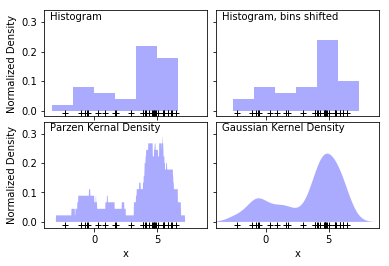

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
    
np.random.seed(1)
N = 30
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF',density=True)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', density=True)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75)
kde.fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Parzen Kernal Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75)
kde.fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')


###  스무스 커널을 이용한 커널 밀도 추정

* 다음과 같은 조건(적분의 값이 1이 되는)을 만족하는 부드러운 커널로 parzen 창을 사용하면 불연속적인 모양을 갖는 문제들이 극복될 수 있다.

$$ \int_{R^D} K(x) dx = 1 $$

* 일반적으로 $K(x)$로는 다음과 같은 가우시안 밀도 함수가 사용되며

$$ K(x) = { 1 \over (2 \pi)^{D/2}} \exp \left(-{1\over2} x^Tx\right)$$


* 밀도추정식은 앞에서와 마찬가지로 다음과 같게 된다. 

$$ p_{\tiny KDE}(x)= \frac { 1 }{ N{ h }^{ D } } \sum _{ n=1 }^{ N }{ K\left(\frac {x - { x }^{(n }}{ h } \right) } $$
$$ = {1 \over N} \sum_{n=1}^N { 1 \over( h \sqrt{2 \pi})^D } \exp \left[-{1\over2} \left(\frac {x - { x }^{(n }}{ h } \right)^2 \right] $$


<img src="./images/smooth-kde.png" width="300">


* Parzen 창 추정은 관측점을 중심으로 하는 box(상자)들의 합으로 간주될 수 있고, 스무드 커널 추정의 경우는 관측점에 놓인 부드러운 범프(bump)들의 합으로 간주될 수 있다.


* 커널함수는 데이터점 위의 튀어나온 모양을 결정지으며, $h$는 **스무딩 파라미터** 또는 **진폭**이라 불리우며 폭을 결정 짖는다.


* 진폭이 크면 밀도가 과하게 스무드되어 데이터 안의 구조를 덮어버리게 되며, 작은 진폭은 너무 뾰족한 밀도 추정으로 해석이 어렵게 되므로 진폭의 결정이 밀도추정에 중요한 문제이다.

<img src="./images/smooth-kde2.png" width="400">

#### 창 함수 효과

<img src="./images/window-effect.png" width="400">
<img src="./images/window-effect2.png" width="400">

#### 언더 스무드 vs 오버 스무드 추정
<img src="./images/under_smooth.png" width="250" align="left">
<img src="./images/over_smooth.png" width="250">
<img src="./images/under_over_smooth.png" width="550">


### k-NNR을 이용한 밀도 추정 예

* k-NNR 방법에서는 추정점 $x$ 주위를 둘러싸는 부피를 $k$ 개의 데이터 점이 포함되도록 증가시키게 된다.

* 그러면 밀도추정은 다음과 같이 된다.

$$ p(x) \simeq { k \over NV} = { k \over N \cdot C_D \cdot R_k^D(x) }$$

* 여기에서 $R_k(x) = k$**번째 가장 근접한 이웃데이터 와 추정점 $x$ 간의 거리**

* $C_D= D$**차원의 단위 구의 체적**으로 다음과 같이 주어진다.

$$ C_D = { \pi^{D/2} \over (D/2)! } = { \pi^{D/2} \over \Gamma(D/2+1) }$$

따라서 $C_1=2, C_2=π, C_3=4\pi/3$ 등이 된다.


$\because$ $\Gamma \left({3\over 2}\right)= {\sqrt{\pi}\over 2}, \Gamma\left({5\over 2}\right)= {3\sqrt{\pi}\over 4}$ 

<img src="./images/k-nnr.png" width="350">

일반적으로 k-NNR방법으로 얻어지는 추정은 그다지 만족스럽지 못하다.

* 추정이 국부적인 잡음에 약함
* 매우 긴 잔여(heavy tail)를 갖는 추정을 만든다.
* 함수 $R_k(x)$는 미분이 불가능 하므로 밀도추정은 불연속적이게 된다.
* 결과로 얻어지는 밀도는 그의 적분이 발산하므로 실제확률밀도라 할 수 없다.

<img src="./images/k-nnr2.png" width="450">

* 2차원에서의 k-NNR 밀도추정 : 윗그림은 다음과 같은 가우시안혼합모델의 실제 밀도를 나타내고 있으며

$$ p(x) = {1 \over 2}\mathcal{N}(\mu_1, \Sigma_1) + {1 \over 2}\mathcal{N}(\mu_2, \Sigma_2) $$
$$ \text{with } \begin{cases}
\mu_1 = [0, 5]^T & \Sigma_1= \begin{bmatrix} 1 &1 \\ 1 & 2  \end{bmatrix}  \\
\mu_2 = [5, 0]^T & \Sigma_2= \begin{bmatrix} 1 &-1 \\ -1 & 4  \end{bmatrix}
\end{cases}
$$

* 아래의 그림은 $N=200$인 자료에서 $k=10$인 이웃점들을 사용해 추정된 밀도를 나타내고 있다.

* 두 분포의 등고선 그림과 추정에 사용된 훈련 자료를 다음페이지에서 보이고 있다. 


<img src="./images/k-nnr3.png" width="250">
<img src="./images/k-nnr4.png" width="400">

### k-NNR 을 이용한 밀도 추정 (베이즈 분류기)

k-NNR 방법의 주된 장점은 베이즈 분류기의 아주 간단한 근사를 유도해 내는데 있다.

* $N$ 개의 자료를 가진 경우, 여기에서 클래스 $\omega_i$ 로부터는 $N_i$, 그리고 우리가 모르는 표본 $x_u$를 분류하기를 원할 경우 $\rightarrow$ $x_u$주변에 체적이 $V$인 초구체(hyper-sphere)를 그리고, 이 체적 안에 전부 $k$개의 표본이, 그 중 $\omega_i$ 로부터는 $k_i$ 개가  포함된다고 가정하자.


* 그러면 k-NNR 방법을 사용하여 우도함수를 근사할 수 있다.

$$ p(x|\omega_i) = { k_i \over N_i V} $$

* 마찬가지로 비조건적인 밀도는   $p(x) = { k \over NV} $ 로 추정되고


* 사전확률은 $ p(\omega_i) = { N_i \over N }$ 으로 근사된다.


* 이들을 모두 정리하면, 베이즈 분류기는 다음과 같이 된다.

$$ p(\omega_i | x ) = { p(x|\omega_i) p(\omega_i) \over p(x) } =
{ { k_i \over N_i V}\cdot { N_i \over N } \over { k \over NV}} = { k_i \over k} $$


* 라벨이 없는 표본이 주어질 경우, 학습 데이터 집합에서 $k$개의 가장 가까운 라벨이 있는 표본을 찾아내고 k개의 부분집합 내에 가장 빈도가 많이 나타나는 클래스에 $x_u$ 를 할당하는 방법 


* k-NNR의 필요데이터 
  - 상수 $k$
  - 라벨이 있는 학습 데이터 집합 (훈련자료)
  - 집합의 표본
  - 근접도를 잴 수 있는 거리 척도
  
  
* Example
  - 좌측과 같이 세 개의 클래스가 주어진 경우 $x_u$ 의 클래스를 결정하기.
  - 유클리디안 거리를 사용하여 $k=5$ 인 주변의 자료들을 사용하면. 주변의 가장 근접한 5개의 이웃한 자료들 중에서 4개는 $\omega_1$에 속하며, 1는  $\omega_3$에 속하므로 $x_u$ 는 그 중에서 가장 우세한  $\omega_1$에 속하게 된다.


<img src="./images/k-nnr5.png" width="400">

<img src="./images/k-nnr6.png" width="500">
<img src="./images/k-nnr7.png" width="500">

 ### 비모수 밀도 추정을 이용한 패턴 인식
 
* 장점
  - 분석이 용이하다
  - 구현이 간단하다
  - 표본의 개수가 아주 큰 극한일 경우$(N\rightarrow \infty$)에는 거의 최적인 방법이다.
  - 국지적인 정보를 사용하므로 매우 적응적인 결과를 낳는다.
  - 병렬처리가 용이하다.
  
* 단점
  - 커다란 저장공간이 필요하다.
  - 많은 계산시간이 소요된다.
  - 차원의 저주”에 영향을 크게 받는다.
  
* 1-NNR vs k-NNR
  - 큰 k를 사용할 경우의 두 가지 장점
    - 스무드한 결정 영역을 만든다. 
    - 확률적인 정보를 제공한다 : 각 클래스들에 대한 표본의 비율은 결정시의 불확실 정도의 정보를 알려준다.
  - 큰 k를 사용시 불이익
    - 너무 많은 표본이 사용되기 때문에 추정에 있어서 국지적인 성분을 제거한다.
    - 많은 계산이 소요된다.


### Practice (k-NNR 방식을 사용한 분류기 적용)

(from https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55)

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


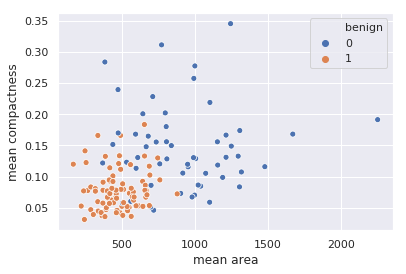

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

breast_cancer = load_breast_cancer()
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
print(X.columns)
X = X[['mean area', 'mean compactness']]
y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

sns.scatterplot(
    x='mean area',
    y='mean compactness',
    hue='benign',
    data=X_test.join(y_test, how='outer')
)

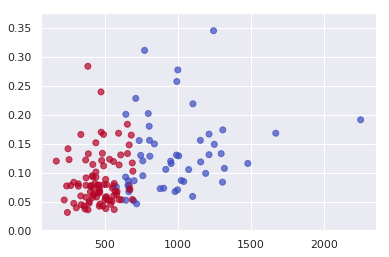

In [24]:
plt.scatter(
    X_test['mean area'],
    X_test['mean compactness'],
    c=y_pred,
    cmap='coolwarm',
    alpha=0.7
)